<img src=https://raw.githubusercontent.com/superwise-ai/elemeta/54825ed11287ac69d809a4590749d6b63404dd1d/docs/images/elemeta_cover_image_white_narrow.png alt="Elemeta">

# <a name="EDA"></a>EDA - Exploratory Data Analysis
This notebook will demonstrate how to use Elemeta for EDA. It will illustrates how extracted meta-features contain information that can be used to predict how many likes a tweet will receive.


---

In [ ]:
!pip install elemeta
!pip install matplotlib
!pip install seaborn

Let's start by enriching our reviews dataset again:

In [1]:
from elemeta.dataset.dataset import get_tweets_likes

tweets_eda = get_tweets_likes().sample(5000)

In [2]:
tweets_eda.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
10769,rihanna,"I'd rather beee, smoking weeeed, everytime ya ...",NaN,28/05/2014 04:45,4.715130e+17,en,NaN,NaN,28505,28028
31864,Cristiano,Soon 👍🏼 https://t.co/w6Q4JitA1B,NaN,02/09/2016 11:39,7.716740e+17,en,NaN,NaN,30516,6975
23929,jtimberlake,🏆🎃 https://t.co/mbVAiWLNlh,NaN,31/10/2015 20:39,6.605570e+17,und,NaN,NaN,1515,391
39678,jimmyfallon,"Tonight: Ray Romano is here! Plus @lucyhale, m...",NaN,15/01/2016 15:03,6.880140e+17,en,NaN,NaN,2580,591
16887,ladygaga,@iWant_Gaga Blond secrets,NaN,18/07/2015 08:06,6.223170e+17,en,NaN,NaN,1897,884


Let's start by enriching our tweets dataste

In [3]:
from elemeta.nlp.metafeature_extractors_runner import MetafeatureExtractorsRunner

metafeature_extractors_runner = MetafeatureExtractorsRunner()

print("The original dataset had {} columns".format(tweets_eda.shape[1]))

# The enrichment process
print("Processing...")
tweets_eda = metafeature_extractors_runner.run_on_dataframe(dataframe=tweets_eda,text_column='content')
print("The transformed dataset has {} columns".format(tweets_eda.shape[1]))



The original dataset had 10 columns
Processing...


/Users/bigicecream/Library/Caches/pypoetry/virtualenvs/elemeta-n0D7hfG7-py3.11/lib/python3.11/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/bigicecream/Library/Caches/pypoetry/virtualenvs/elemeta-n0D7hfG7-py3.11/lib/python3.11/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname ET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Users/bigicecream/Library/Caches/pypoetry/virtualenvs/elemeta-n0D7hfG7-py3.11/lib/python3.11/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EST identified b

The transformed dataset has 36 columns


In [4]:
tweets_eda.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares,...,capital_letters_ratio,regex_match_count,email_count,link_count,hashtag_count,mention_count,syllable_count,acronym_count,date_count,detect_langauge
10769,rihanna,"I'd rather beee, smoking weeeed, everytime ya ...",NaN,28/05/2014 04:45,4.715130e+17,en,NaN,NaN,28505,28028,...,0.013889,1,0,0,0,0,24,0,0,en
31864,Cristiano,Soon 👍🏼 https://t.co/w6Q4JitA1B,NaN,02/09/2016 11:39,7.716740e+17,en,NaN,NaN,30516,6975,...,0.263158,1,0,0,0,0,5,1,0,so
23929,jtimberlake,🏆🎃 https://t.co/mbVAiWLNlh,NaN,31/10/2015 20:39,6.605570e+17,und,NaN,NaN,1515,391,...,0.277778,1,0,0,0,0,6,0,0,unknown
39678,jimmyfallon,"Tonight: Ray Romano is here! Plus @lucyhale, m...",NaN,15/01/2016 15:03,6.880140e+17,en,NaN,NaN,2580,591,...,0.107527,1,0,0,2,2,23,0,0,en
16887,ladygaga,@iWant_Gaga Blond secrets,NaN,18/07/2015 08:06,6.223170e+17,en,NaN,NaN,1897,884,...,0.142857,1,0,0,0,1,7,0,0,en


Let's look at the distribution of labels (number of likes). We can clearly see a long right-tail distribution.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Mean number of likes = 9639.2058
Median number of likes = 2499.5


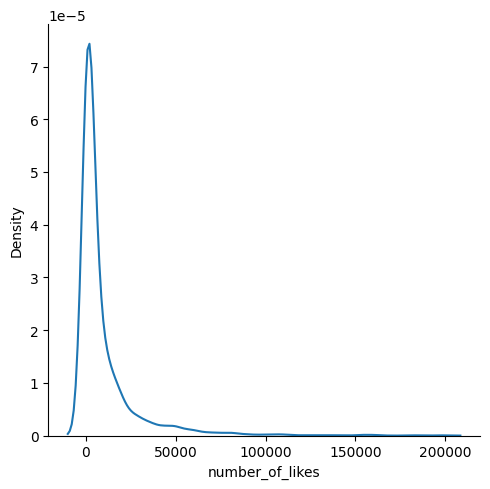

In [6]:
print("Mean number of likes = " + str(np.mean(tweets_eda.number_of_likes)))
print("Median number of likes = " + str(np.median(tweets_eda.number_of_likes)))
sns.displot(tweets_eda, x="number_of_likes",kind="kde")

According to the below analysis, there is a clear correlation between tweet language and likes, since number_of_likes distribute differently between languages.

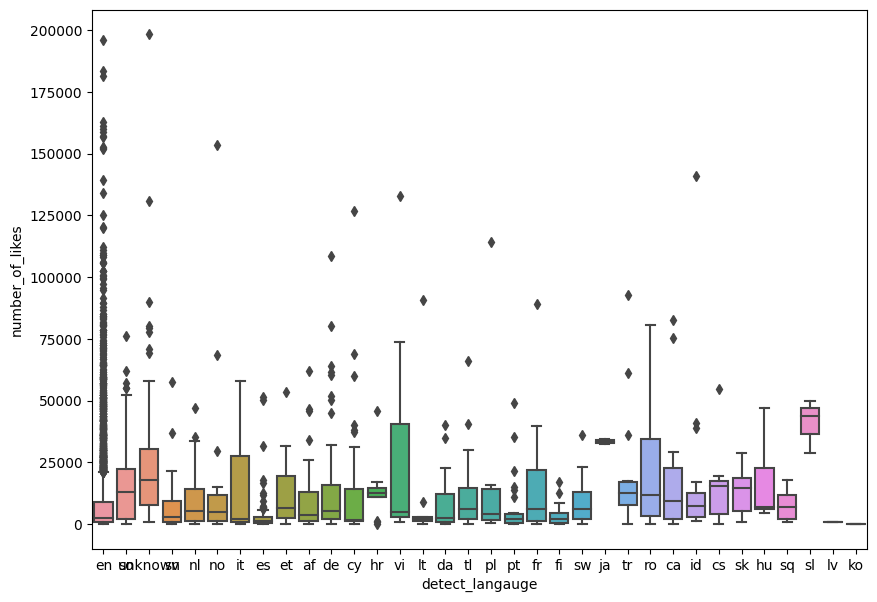

In [7]:
plt.subplots(figsize=(10,7))
sns.boxplot(x="detect_langauge", y="number_of_likes", data=tweets_eda);

Apart from a few outliers, tweets with at least one emoji get more likes.

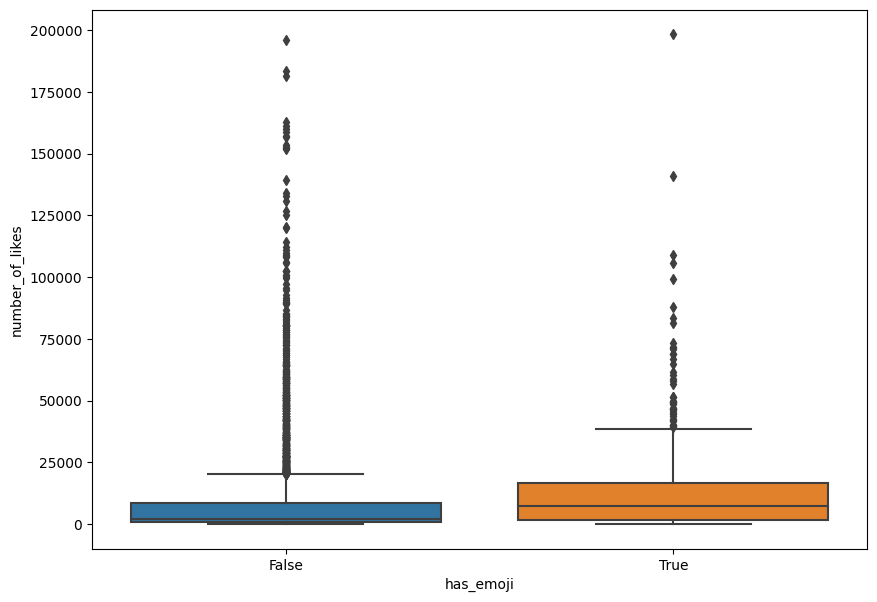

In [8]:
tweets_eda['has_emoji'] = tweets_eda['emoji_count'].apply(lambda x: 'False' if x <= 0 else 'True')
plt.subplots(figsize=(10,7))
sns.boxplot(x="has_emoji", y="number_of_likes", data=tweets_eda);